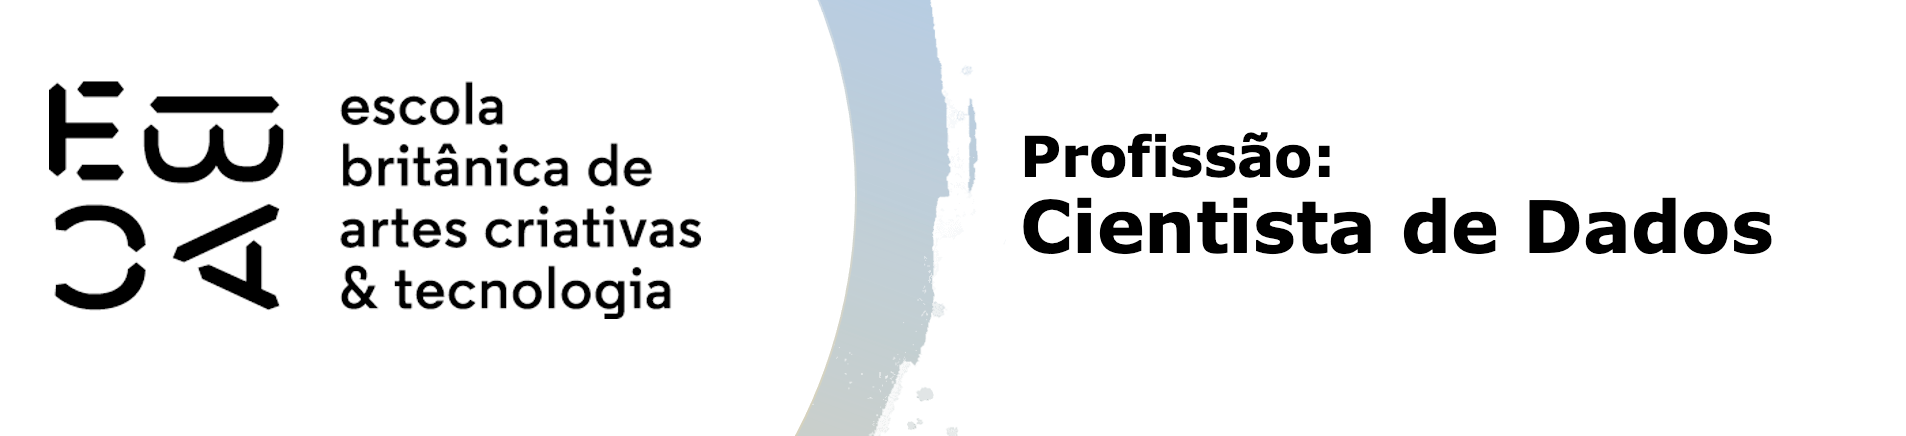

# Regressão III - Tarefa

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dados = pd.read_csv('previsao_de_renda.csv', index_col=0)
dados.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [12]:
# Verificando a quantidade de valores missing em cada coluna
valores_missing = dados.isnull().sum()
valores_missing

data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [13]:
# Substituindo valores missing pela média da coluna
dados_preenchidos = dados.fillna(dados.mean(numeric_only=True))
dados_preenchidos

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,7.722635,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [14]:
valores_missing_apos = dados_preenchidos.isnull().sum()

valores_missing, valores_missing_apos

(data_ref                    0
 id_cliente                  0
 sexo                        0
 posse_de_veiculo            0
 posse_de_imovel             0
 qtd_filhos                  0
 tipo_renda                  0
 educacao                    0
 estado_civil                0
 tipo_residencia             0
 idade                       0
 tempo_emprego            2573
 qt_pessoas_residencia       0
 renda                       0
 dtype: int64,
 data_ref                 0
 id_cliente               0
 sexo                     0
 posse_de_veiculo         0
 posse_de_imovel          0
 qtd_filhos               0
 tipo_renda               0
 educacao                 0
 estado_civil             0
 tipo_residencia          0
 idade                    0
 tempo_emprego            0
 qt_pessoas_residencia    0
 renda                    0
 dtype: int64)

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [15]:
# Convertendo a coluna 'data_ref' para o tipo datetime
dados_preenchidos['data_ref'] = pd.to_datetime(dados_preenchidos['data_ref'])

In [16]:
# Ordenando os dados pela data de referência
dados_ordenados = dados_preenchidos.sort_values(by='data_ref')
dados_ordenados

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
658,2015-01-01,10640,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,2157.97
659,2015-01-01,368,M,True,False,0,Empresário,Secundário,Separado,Com os pais,28,1.523288,1.0,3688.80
660,2015-01-01,16498,F,True,True,0,Assalariado,Secundário,Solteiro,Casa,36,7.471233,1.0,1996.24
661,2015-01-01,11440,F,True,True,0,Assalariado,Superior completo,Casado,Casa,38,2.846575,2.0,1755.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,2016-03-01,7029,F,False,True,0,Empresário,Secundário,Casado,Casa,53,4.797260,2.0,3722.01
14339,2016-03-01,10206,M,True,True,0,Assalariado,Secundário,Solteiro,Casa,49,8.386301,1.0,25277.37
14340,2016-03-01,15668,M,True,True,1,Assalariado,Superior completo,Casado,Casa,56,0.320548,3.0,3207.19
14327,2016-03-01,7848,F,False,True,0,Pensionista,Superior completo,Casado,Casa,61,7.722635,2.0,1185.65


In [17]:
# Identificando os três últimos meses
ultimo_mes = dados_ordenados['data_ref'].max()
tres_meses_atras = ultimo_mes - pd.DateOffset(months=3)
tres_meses_atras

Timestamp('2015-12-01 00:00:00')

In [18]:
# Separando os dados em treino e teste
dados_teste = dados_ordenados[dados_ordenados['data_ref'] > tres_meses_atras]
dados_treino = dados_ordenados[dados_ordenados['data_ref'] <= tres_meses_atras]

# Exibindo o tamanho das bases de treino e teste
len(dados_treino), len(dados_teste)

(12000, 3000)

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [19]:
variaveis_independentes = dados_treino.drop(columns=['renda'])
variaveis_independentes = variaveis_independentes.select_dtypes(exclude=['datetime64[ns]'])

In [20]:
# Selecionando a variável dependente
variavel_dependente = dados_treino['renda']

In [21]:
# Convertendo variáveis categóricas em dummies (one-hot encoding)
variaveis_independentes = pd.get_dummies(variaveis_independentes, drop_first=True)

In [22]:
# Separando os dados de treino em treino e validação
X_treino, X_val, y_treino, y_val = train_test_split(variaveis_independentes, variavel_dependente, test_size=0.2, random_state=42)

In [23]:
# Construindo o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [24]:
# Fazendo previsões na base de validação
y_pred = modelo.predict(X_val)

In [25]:
# Calculando o R² ajustado
n = X_val.shape[0]  # número de observações
p = X_val.shape[1]  # número de preditores
r2 = r2_score(y_val, y_pred)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

r2_ajustado

0.27439608334907684

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [26]:
# Criando uma nova coluna para categorizar 'tempo_emprego' em 20 quantis, permitindo duplicatas
dados_treino['categoria_tempo_emprego'] = pd.qcut(dados_treino['tempo_emprego'], q=20, labels=False, duplicates='drop')

# Calculando a quantidade de observações, a média do log-renda e a média do tempo de emprego para cada categoria
perfil_tempo_emprego = dados_treino.groupby('categoria_tempo_emprego').agg(
    quantidade_observacoes=('tempo_emprego', 'size'),
    media_log_renda=('renda', lambda x: np.mean(np.log(x))),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

# Exibindo o DataFrame com a tabela de perfil
perfil_tempo_emprego

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_2892\1611209659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treino['categoria_tempo_emprego'] = pd.qcut(dados_treino['tempo_emprego'], q=20, labels=False, duplicates='drop')


,categoria_tempo_emprego,quantidade_observacoes,media_log_renda,media_tempo_emprego
0,0,600,7.784944,0.522201
1,1,602,7.857212,1.103309
2,2,601,7.897405,1.732911
3,3,597,7.941044,2.433216
4,4,603,8.011240,3.205089
5,5,600,8.077317,3.903753
6,6,597,8.124479,4.559978
7,7,609,8.181083,5.314785
8,8,591,8.127469,6.143940
9,9,607,8.280461,6.948789


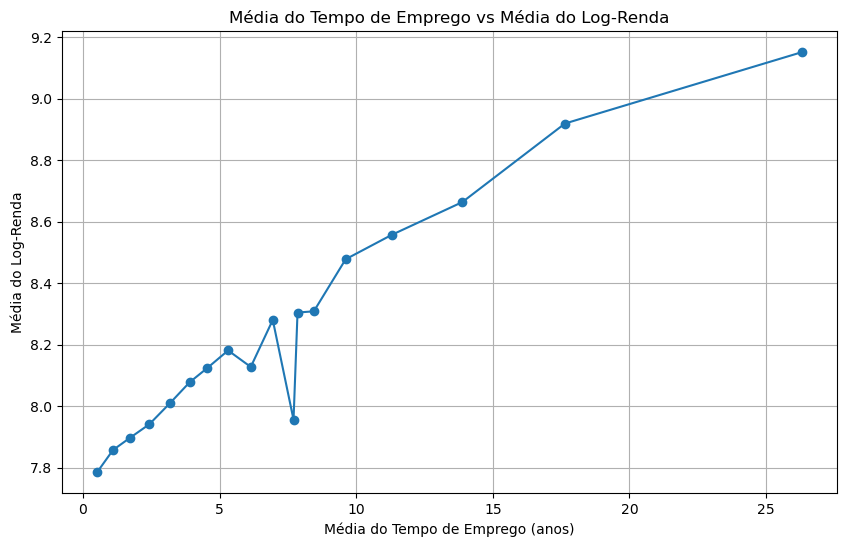

In [29]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(perfil_tempo_emprego['media_tempo_emprego'], perfil_tempo_emprego['media_log_renda'], marker='o')
plt.title('Média do Tempo de Emprego vs Média do Log-Renda')
plt.xlabel('Média do Tempo de Emprego (anos)')
plt.ylabel('Média do Log-Renda')
plt.grid(True)
plt.show()

 O gráfico indica uma tendência de aumento no log-renda à medida que o tempo de emprego aumenta, o que sugere uma relação positiva entre essas duas variáveis. A transformação logarítmica aplicada à variável renda parece apropriada, pois ajuda a linearizar a relação, o que pode ser útil para melhorar a performance dos modelos preditivos. Além disso, o gráfico não mostra sinais de uma relação altamente não linear, o que implica que as transformações vistas, como a logarítmica, devem fornecer bons resultados.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [34]:
# Removendo qualquer coluna de tipo datetime64
variaveis_independentes_log = dados_treino.drop(columns=['renda', 'tempo_emprego'])
variaveis_independentes_log = variaveis_independentes_log.select_dtypes(exclude=['datetime64[ns]'])

# Aplicando a transformação logarítmica na variável 'tempo_emprego'
variaveis_independentes_log['log_tempo_emprego'] = np.log1p(dados_treino['tempo_emprego'])

# Construindo o modelo com a variável transformada
variaveis_independentes_log = pd.get_dummies(variaveis_independentes_log, drop_first=True)

X_treino_log, X_val_log, y_treino_log, y_val_log = train_test_split(variaveis_independentes_log, variavel_dependente, test_size=0.2, random_state=42)

modelo_log = LinearRegression()
modelo_log.fit(X_treino_log, y_treino_log)

# Fazendo previsões na base de validação
y_pred_log = modelo_log.predict(X_val_log)

# Calculando o R² ajustado
n_log = X_val_log.shape[0]  
p_log = X_val_log.shape[1]  
r2_log = r2_score(y_val_log, y_pred_log)
r2_ajustado_log = 1 - (1 - r2_log) * ((n_log - 1) / (n_log - p_log - 1))
r2_ajustado_log

0.27367695696641525

In [36]:
# Removendo qualquer coluna de tipo datetime64
variaveis_independentes_sqrt = dados_treino.drop(columns=['renda', 'tempo_emprego', 'log_tempo_emprego'])
variaveis_independentes_sqrt = variaveis_independentes_sqrt.select_dtypes(exclude=['datetime64[ns]'])

# Aplicando a transformação de raiz quadrada na variável 'tempo_emprego'
variaveis_independentes_sqrt['sqrt_tempo_emprego'] = np.sqrt(dados_treino['tempo_emprego'])

# Construindo o modelo com a variável transformada
variaveis_independentes_sqrt = pd.get_dummies(variaveis_independentes_sqrt, drop_first=True)

X_treino_sqrt, X_val_sqrt, y_treino_sqrt, y_val_sqrt = train_test_split(variaveis_independentes_sqrt, variavel_dependente, test_size=0.2, random_state=42)

modelo_sqrt = LinearRegression()
modelo_sqrt.fit(X_treino_sqrt, y_treino_sqrt)

# Fazendo previsões na base de validação
y_pred_sqrt = modelo_sqrt.predict(X_val_sqrt)

# Calculando o R² ajustado
n_sqrt = X_val_sqrt.shape[0]  
p_sqrt = X_val_sqrt.shape[1]  
r2_sqrt = r2_score(y_val_sqrt, y_pred_sqrt)
r2_ajustado_sqrt = 1 - (1 - r2_sqrt) * ((n_sqrt - 1) / (n_sqrt - p_sqrt - 1))
r2_ajustado_sqrt

0.2666917801682901

a transformação logarítmica foi a mais eficaz das duas, mas a diferença em relação ao modelo original é mínima.

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [45]:
# Removendo qualquer coluna do tipo datetime64 tanto da base de treino quanto da base de teste
dados_treino = dados_treino.select_dtypes(exclude=['datetime64[ns]'])
dados_teste = dados_teste.select_dtypes(exclude=['datetime64[ns]'])

# Aplicando a transformação logarítmica e raiz quadrada na variável 'tempo_emprego' na base de treino
dados_treino['log_tempo_emprego'] = np.log1p(dados_treino['tempo_emprego'])
dados_treino['sqrt_tempo_emprego'] = np.sqrt(dados_treino['tempo_emprego'])

# Realizando o one-hot encoding nas variáveis categóricas
X_treino_final = pd.get_dummies(dados_treino.drop(columns=['renda', 'tempo_emprego']), drop_first=True)
y_treino_final = dados_treino['renda']

# Aplicando as mesmas transformações na base de teste
dados_teste['log_tempo_emprego'] = np.log1p(dados_teste['tempo_emprego'])
dados_teste['sqrt_tempo_emprego'] = np.sqrt(dados_teste['tempo_emprego'])

# Realizando o one-hot encoding nas variáveis categóricas na base de teste
X_teste_final = pd.get_dummies(dados_teste.drop(columns=['renda', 'tempo_emprego']), drop_first=True)

# Garantindo que a base de teste tenha as mesmas colunas que a base de treino
X_teste_final = X_teste_final.reindex(columns=X_treino_final.columns, fill_value=0)

# Treinando o modelo na base de treino
modelo_final = LinearRegression()
modelo_final.fit(X_treino_final, y_treino_final)

# Fazendo previsões na base de teste com o modelo treinado
y_pred_teste_final = modelo_final.predict(X_teste_final)

# Calculando o R² ajustado na base de teste
n_teste_final = X_teste_final.shape[0]  # número de observações na base de teste
p_teste_final = X_teste_final.shape[1]  # número de preditores
r2_teste_final = r2_score(dados_teste['renda'], y_pred_teste_final)
r2_ajustado_teste_final = 1 - (1 - r2_teste_final) * ((n_teste_final - 1) / (n_teste_final - p_teste_final - 1))

r2_ajustado_teste_final

0.06788972872813859

In [46]:
# Aplicando a transformação logarítmica na variável 'tempo_emprego' na base de teste
dados_teste['log_tempo_emprego'] = np.log1p(dados_teste['tempo_emprego'])

# Realizando o one-hot encoding nas variáveis categóricas na base de teste
X_teste_log = pd.get_dummies(dados_teste.drop(columns=['renda', 'tempo_emprego']), drop_first=True)

# Garantindo que a base de teste tenha as mesmas colunas que a base de treino
X_teste_log = X_teste_log.reindex(columns=X_treino_final.columns, fill_value=0)

# Fazendo previsões na base de teste com o modelo original
y_pred_teste_log = modelo_final.predict(X_teste_log)

# Calculando o R² ajustado na base de teste
n_teste_log = X_teste_log.shape[0]  # número de observações na base de teste
p_teste_log = X_teste_log.shape[1]  # número de preditores
r2_teste_log = r2_score(dados_teste['renda'], y_pred_teste_log)
r2_ajustado_teste_log = 1 - (1 - r2_teste_log) * ((n_teste_log - 1) / (n_teste_log - p_teste_log - 1))

r2_ajustado_teste_log

0.06788972872813859

In [48]:
# Aplicando a transformação de raiz quadrada na variável 'tempo_emprego' na base de teste
dados_teste['sqrt_tempo_emprego'] = np.sqrt(dados_teste['tempo_emprego'])

# Realizando o one-hot encoding nas variáveis categóricas na base de teste
X_teste_sqrt = pd.get_dummies(dados_teste.drop(columns=['renda', 'tempo_emprego']), drop_first=True)

# Garantindo que a base de teste tenha as mesmas colunas que a base de treino
X_teste_sqrt = X_teste_sqrt.reindex(columns=X_treino_final.columns, fill_value=0)

# Fazendo previsões na base de teste com o modelo treinado com a transformação de raiz quadrada
y_pred_teste_sqrt = modelo_final.predict(X_teste_sqrt)

# Calculando o R² ajustado na base de teste
n_teste_sqrt = X_teste_sqrt.shape[0]  # número de observações na base de teste
p_teste_sqrt = X_teste_sqrt.shape[1]  # número de preditores
r2_teste_sqrt = r2_score(dados_teste['renda'], y_pred_teste_sqrt)
r2_ajustado_teste_sqrt = 1 - (1 - r2_teste_sqrt) * ((n_teste_sqrt - 1) / (n_teste_sqrt - p_teste_sqrt - 1))

r2_ajustado_teste_sqrt

0.06788972872813859